In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importations des données

In [2]:
client1_df = pd.read_csv("Clients_10.csv", encoding="ISO-8859-1")
client2_df = pd.read_csv("Clients_2.csv", encoding="ISO-8859-1")
im_df = pd.read_csv("Immatriculations.csv", encoding="ISO-8859-1")
marketing_df = pd.read_csv("Marketing.csv", encoding="ISO-8859-1")
catalog_df = pd.read_csv("Catalogue.csv", encoding="ISO-8859-1")

# Analyse exploratoires des données clients

### fusion des données clients

In [3]:
client_df = pd.concat([client1_df, client2_df], axis=0).reset_index(drop=True)

In [4]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 200000 non-null  object
 1   sexe                200000 non-null  object
 2   taux                200000 non-null  object
 3   situationFamiliale  200000 non-null  object
 4   nbEnfantsAcharge    200000 non-null  object
 5   2eme voiture        200000 non-null  object
 6   immatriculation     200000 non-null  object
dtypes: object(7)
memory usage: 10.7+ MB


On converti en valeurs numérique (float)

In [5]:
client_df[['age', 'taux', 'nbEnfantsAcharge']] = client_df[['age', 'taux', 'nbEnfantsAcharge']].apply(pd.to_numeric, errors='coerce')

In [6]:
client_df.isnull().sum()

age                   400
sexe                    0
taux                  407
situationFamiliale      0
nbEnfantsAcharge      387
2eme voiture            0
immatriculation         0
dtype: int64

On drop, s'il y a les données d'immatriculation qui ne respectent pas le format 9999 AA 99

In [7]:
cl_ix = client_df[client_df.immatriculation.str.contains('^[\d]{1,4}[\s][\w]{2}[\s][\d]{2}$', regex=True) == False].index
client_df.drop(cl_ix, inplace=True)

On remplace les données manquante par la médiane

In [8]:
client_df.age.fillna(client_df.age.median(), inplace=True)
client_df.taux.fillna(client_df.taux.median(), inplace=True)
client_df.nbEnfantsAcharge.fillna(client_df.nbEnfantsAcharge.median(), inplace=True)

On reconverti les données float en int

In [9]:
client_df[['age', 'taux', 'nbEnfantsAcharge']] = client_df[['age', 'taux', 'nbEnfantsAcharge']].astype('int')

On drop les lignes d'immatriculation répétitives

In [10]:
client_df.immatriculation.drop_duplicates(inplace=True)

On affiche la distribution des variables afin d'avoir les valeurs possibles

<AxesSubplot:xlabel='2eme voiture', ylabel='Count'>

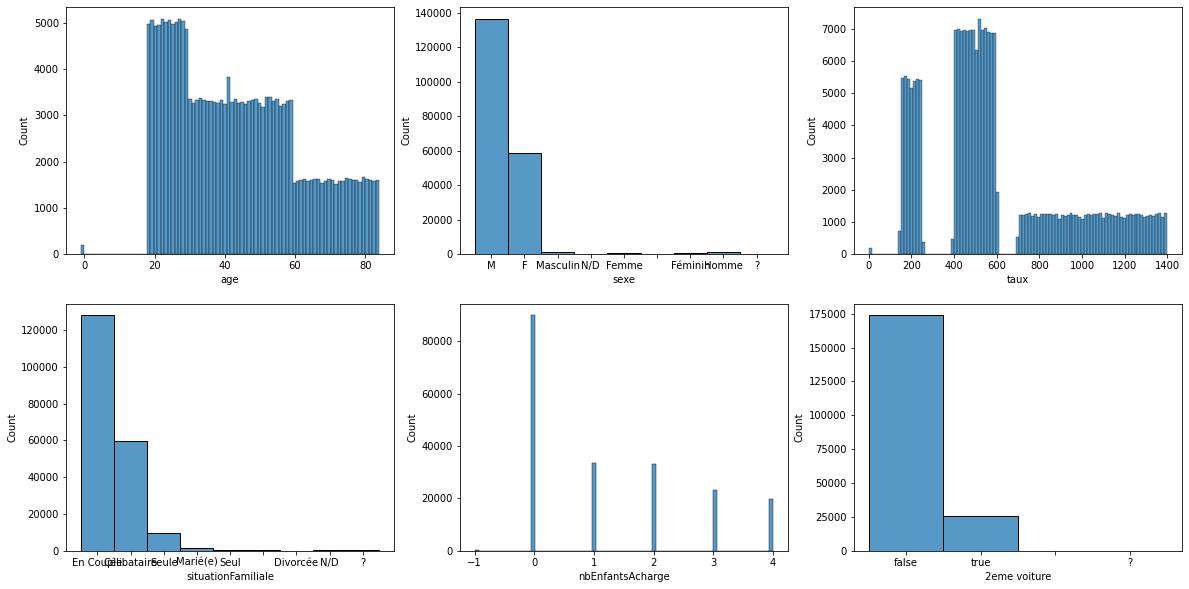

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
sns.histplot(client_df.age, ax=axs[0, 0])
sns.histplot(client_df.sexe, ax=axs[0, 1])
sns.histplot(client_df.taux, ax=axs[0, 2])
sns.histplot(client_df.situationFamiliale, ax=axs[1, 0])
sns.histplot(client_df.nbEnfantsAcharge, ax=axs[1, 1])
sns.histplot(client_df["2eme voiture"], ax=axs[1, 2])

In [12]:
client_df[client_df.immatriculation.isin(['?', 'N/D', ' '])]

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation


Imputation de l'âge

In [13]:
client_df.loc[(client_df.age < 18) | (client_df.age > 84), "age"] = client_df.age.median()

In [14]:
client_df.age.unique()

array([38, 50, 54, 35, 43, 64, 22, 79, 82, 23, 30, 62, 19, 27, 41, 25, 34,
       42, 21, 31, 51, 70, 29, 24, 47, 46, 39, 37, 40, 55, 69, 84, 59, 49,
       18, 57, 20, 28, 32, 56, 83, 33, 65, 26, 60, 77, 44, 78, 53, 58, 72,
       61, 81, 73, 66, 48, 36, 45, 52, 80, 71, 68, 76, 75, 63, 74, 67])

Imputation du taux

In [15]:
client_df.loc[(client_df.taux < 544) | (client_df.taux > 74185), "taux"] = client_df.taux.median()

imputation du sexe

In [16]:
client_df.loc[(client_df.sexe == 'Femme') | (client_df.sexe == 'Féminin'), "sexe"] = 'F'
client_df.loc[(client_df.sexe == 'Homme') | (client_df.sexe == 'Masculin'), "sexe"] = 'M'

In [17]:
client_df.sexe.unique()

array(['M', 'F', 'N/D', ' ', '?'], dtype=object)

In [18]:
sex_idx_del = client_df[client_df.sexe.isin(['?', 'N/D', ' '])].index
client_df.drop(sex_idx_del, inplace=True)
client_df.sexe.dropna(inplace=True)

Imputation de la situation familiale

On ne garde que les valeurs, célibataire et en couple

In [19]:
client_df.loc[(client_df.situationFamiliale == 'Seul') | (client_df.situationFamiliale == 'Seule') | (client_df.situationFamiliale == 'Divorcée'), "situationFamiliale"] = 'Célibataire'
client_df.loc[(client_df.situationFamiliale == 'Marié(e)'), "situationFamiliale"] = 'En Couple'

In [20]:
client_df.situationFamiliale.unique()

array(['En Couple', 'Célibataire', ' ', 'N/D', '?'], dtype=object)

On supprime les lignes qui peuvent compromettre l'analyse de la variable situationFamiliale

In [21]:
sf_idx_del = client_df[client_df.situationFamiliale.isin(['?', 'N/D', ' '])].index
client_df.drop(sf_idx_del, inplace=True)

Imputation du nombre d'enfants

On remplace les données qui ne sont pas dans l'intervalle par la médiane

In [22]:
client_df.loc[(client_df.nbEnfantsAcharge < 0) | (client_df.nbEnfantsAcharge > 4), "nbEnfantsAcharge"] = client_df.nbEnfantsAcharge.median()

In [23]:
client_df.nbEnfantsAcharge.unique()

array([3, 1, 0, 4, 2])

Imputation "2ème voiture"

In [24]:
client_df["2eme voiture"].unique()

array(['false', 'true', ' ', '?'], dtype=object)

On supprime les lignes avec les valeurs compromettantes

In [25]:
vt_idx_del = client_df[client_df["2eme voiture"].isin(['?', 'N/D', ' '])].index
client_df.drop(vt_idx_del, inplace=True)

<AxesSubplot:xlabel='2eme voiture', ylabel='Count'>

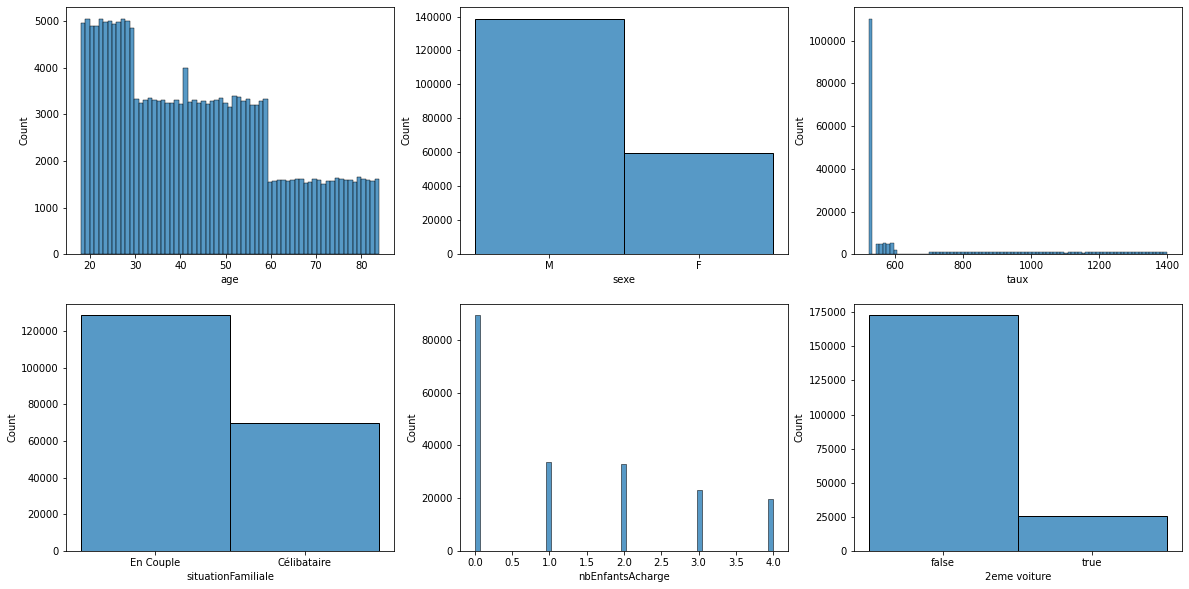

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
sns.histplot(client_df.age, ax=axs[0, 0])
sns.histplot(client_df.sexe, ax=axs[0, 1])
sns.histplot(client_df.taux, ax=axs[0, 2])
sns.histplot(client_df.situationFamiliale, ax=axs[1, 0])
sns.histplot(client_df.nbEnfantsAcharge, ax=axs[1, 1])
sns.histplot(client_df["2eme voiture"], ax=axs[1, 2])

In [27]:
client_df["2eme voiture"] = client_df["2eme voiture"].astype(bool)

# Analyse des données Immatriculation

In [28]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   immatriculation  object
 1   marque           object
 2   nom              object
 3   puissance        int64 
 4   longueur         object
 5   nbPlaces         int64 
 6   nbPortes         int64 
 7   couleur          object
 8   occasion         bool  
 9   prix             int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 139.2+ MB


On supprime les voitures répétitives

In [29]:
im_df.immatriculation.drop_duplicates(inplace=True)

In [30]:
im_df

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029
3,3563 LA 55,Peugeot,1007 1.4,75,courte,5,5,blanc,True,9625
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310
...,...,...,...,...,...,...,...,...,...,...
1999995,771 CQ 78,Mercedes,S500,306,très longue,5,5,gris,True,70910
1999996,8182 PL 97,Lancia,Ypsilon 1.4 16V,90,courte,5,3,blanc,True,9450
1999997,8550 AP 53,Ford,Mondeo 1.8,125,longue,5,5,rouge,False,23900
1999998,737 MK 20,Audi,A2 1.4,75,courte,5,5,bleu,True,12817


<AxesSubplot:xlabel='prix', ylabel='Count'>

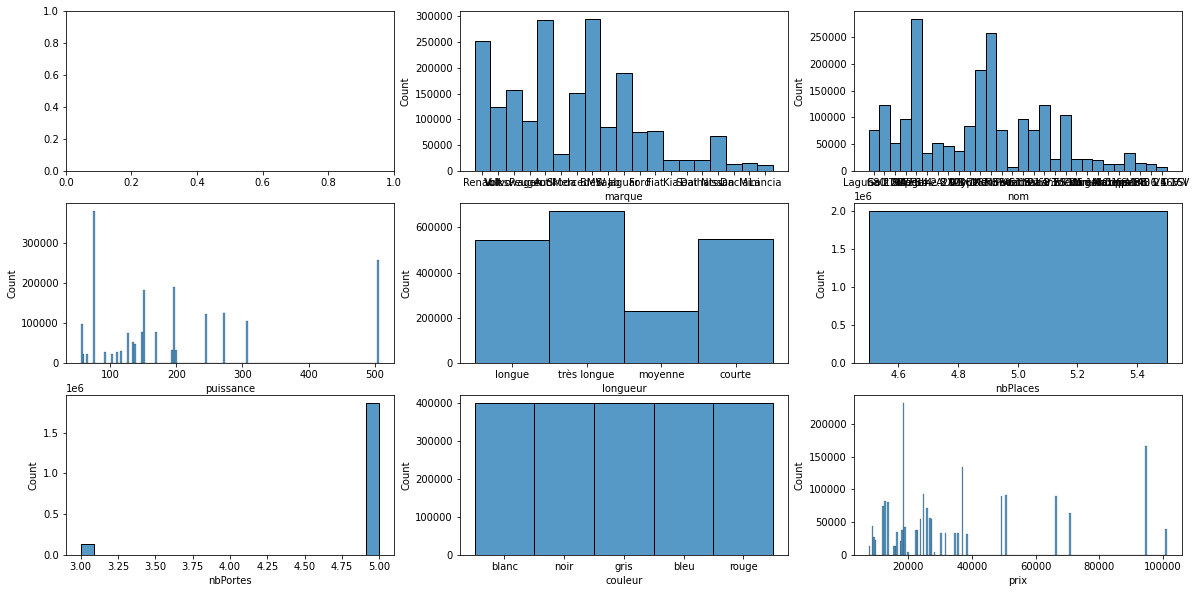

In [31]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
# sns.histplot(im_df.immatriculation, ax=axs[0, 0])
sns.histplot(im_df.marque, ax=axs[0, 1])
sns.histplot(im_df.nom, ax=axs[0, 2])
sns.histplot(im_df.puissance, ax=axs[1, 0])
sns.histplot(im_df.longueur, ax=axs[1, 1])
sns.histplot(im_df.nbPlaces, ax=axs[1, 2])
sns.histplot(im_df.nbPortes, ax=axs[2, 0])
sns.histplot(im_df.couleur, ax=axs[2, 1])
# sns.histplot(im_df.occasion, ax=axs[2, 2])
sns.histplot(im_df.prix, ax=axs[2, 2])

In [32]:
im_df[im_df.occasion.isin(['?', 'N/D', ' '])]

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix


On vérifie si les valeurs de puissance dans le dataset respectent le domaine de valeurs

In [33]:
im_df.loc[(im_df.puissance < 55) | (im_df.puissance > 507), "puissance"]

Series([], Name: puissance, dtype: int64)

On vérifie et supprime toutes les lignes qui contiennent des valeurs qui ne sont pas dans le domaine de valeurs

In [34]:
im_idx = im_df[im_df.immatriculation.str.contains('^[\d]{1,4}[\s][\w]{2}[\s][\d]{2}$', regex=True) == False].index
im_df.drop(im_idx, inplace=True)

In [35]:
marque_arr = ['Audi', 'BMW', 'Dacia', 'Daihatsu', 'Fiat', 'Ford','Honda', 'Hyundaï', 'Jaguar', 'Kia', 'Lancia','Mercedes' , 'Mini', 'Nissan', 'Peugeot', 'Renault', 'Saab', 'Seat', 'Skoda', 'Volkswagen','Volvo']
im_df[im_df.marque.isin(marque_arr) == False]

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix


In [36]:
nom_arr = ['S80 T6', 'Touran 2.0 FSI', 'Polo 1.2 6V','New Beatle 1.8', 'Golf 2.0 FSI', 'Superb 2.8 V6', 'Toledo 1.6', '9.3 1.8T', 'Vel Satis 3.5 V6', 'Megane 2.0 16V','Laguna 2.0T', 'Espace 2.0T', '1007 1.4', 'Primera 1.6', 'Maxima 3.0 V6','Almera 1.8', 'Copper 1.6 16V', 'S500', 'A200', 'Ypsilon 1.4 16V', 'Picanto 1.1', 'X-Type 2.5 V6', 'Matrix 1.6', 'FR-V 1.7', 'Mondeo 1.8', 'Croma 2.2','Cuore 1.0', 'Logan 1.6 MPI', 'M5', '120i', 'A3 2.0 FSI', 'A2 1.4']
nom_idx = im_df[im_df.nom.isin(nom_arr) == False].index
im_df.drop(nom_idx, inplace=True)

In [37]:
im_df[im_df.longueur.isin(['courte', 'moyenne', 'longue', 'très longue']) == False]

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix


In [38]:
im_df.loc[(im_df.nbPlaces < 5) | (im_df.nbPlaces > 7), "nbPlaces"]

Series([], Name: nbPlaces, dtype: int64)

In [39]:
im_df.loc[(im_df.nbPortes < 3) | (im_df.nbPortes > 5), "nbPortes"]
im_df.nbPortes.unique()

array([5, 3], dtype=int64)

In [40]:
im_df[im_df.couleur.isin(['blanc', 'bleu', 'gris', 'noir', 'rouge']) == False]

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix


In [41]:
im_df.occasion.unique()

array([False,  True])

In [42]:
im_df.loc[(im_df.prix < 7500) | (im_df.prix > 101300), "prix"]

Series([], Name: prix, dtype: int64)

In [43]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   immatriculation  object
 1   marque           object
 2   nom              object
 3   puissance        int64 
 4   longueur         object
 5   nbPlaces         int64 
 6   nbPortes         int64 
 7   couleur          object
 8   occasion         bool  
 9   prix             int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 219.0+ MB


# Analyse des données Véhicule

In [44]:
catalog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   marque     270 non-null    object
 1   nom        270 non-null    object
 2   puissance  270 non-null    int64 
 3   longueur   270 non-null    object
 4   nbPlaces   270 non-null    int64 
 5   nbPortes   270 non-null    int64 
 6   couleur    270 non-null    object
 7   occasion   270 non-null    bool  
 8   prix       270 non-null    int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 17.3+ KB


<AxesSubplot:xlabel='prix', ylabel='Count'>

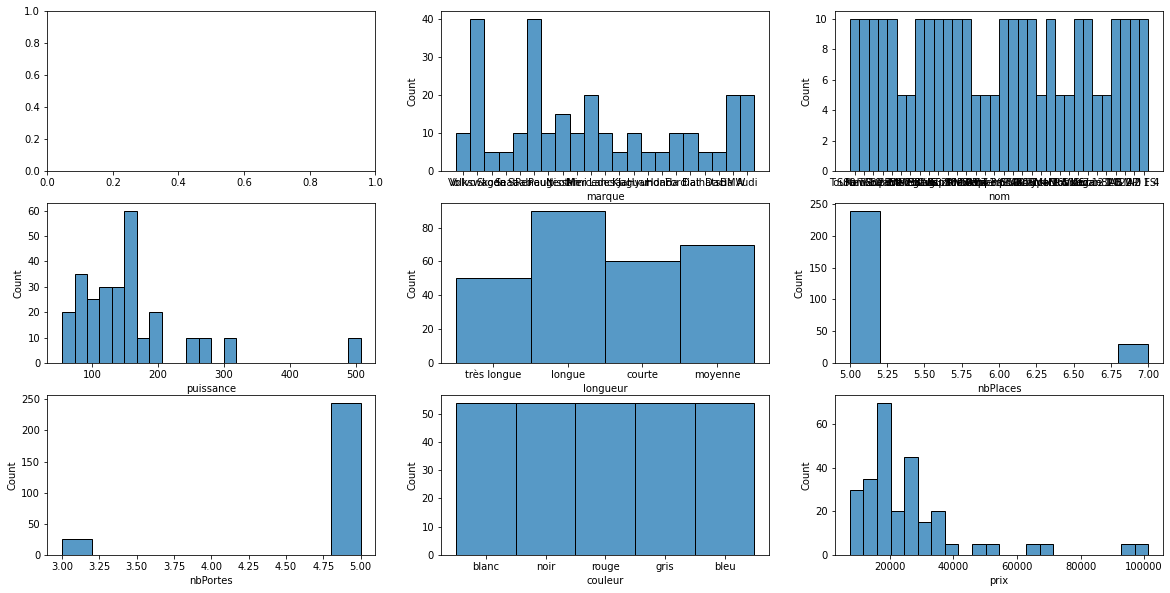

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
sns.histplot(catalog_df.marque, ax=axs[0, 1])
sns.histplot(catalog_df.nom, ax=axs[0, 2])
sns.histplot(catalog_df.puissance, ax=axs[1, 0])
sns.histplot(catalog_df.longueur, ax=axs[1, 1])
sns.histplot(catalog_df.nbPlaces, ax=axs[1, 2])
sns.histplot(catalog_df.nbPortes, ax=axs[2, 0])
sns.histplot(catalog_df.couleur, ax=axs[2, 1])
# sns.histplot(catalog_df.occasion, ax=axs[2, 2])
sns.histplot(catalog_df.prix, ax=axs[2, 2])

In [46]:
catalog_df[catalog_df.occasion.isin(['?', 'N/D', ' '])]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix


In [47]:
catalog_df.marque.unique()

array(['Volvo', 'Volkswagen', 'Skoda', 'Seat', 'Saab', 'Renault',
       'Peugeot', 'Nissan', 'Mini', 'Mercedes', 'Lancia', 'Kia', 'Jaguar',
       'Hyundaï', 'Honda', 'Ford', 'Fiat', 'Daihatsu', 'Dacia', 'BMW',
       'Audi'], dtype=object)

In [48]:
catalog_df[catalog_df.marque.isin(marque_arr) == False]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix


In [49]:
catalog_df[catalog_df.nom.isin(nom_arr) == False]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix


In [50]:
catalog_df[catalog_df.longueur.isin(['courte', 'moyenne', 'longue', 'très longue']) == False]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix


In [51]:
catalog_df.loc[(catalog_df.nbPlaces < 5) | (catalog_df.nbPlaces > 7), "nbPlaces"]

Series([], Name: nbPlaces, dtype: int64)

In [52]:
catalog_df.loc[(catalog_df.nbPortes < 3) | (catalog_df.nbPortes > 5), "nbPortes"]

Series([], Name: nbPortes, dtype: int64)

In [53]:
catalog_df[catalog_df.couleur.isin(['blanc', 'bleu', 'gris', 'noir', 'rouge']) == False]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix


In [54]:
catalog_df.occasion.unique()

array([False,  True])

In [55]:
catalog_df.loc[(catalog_df.prix < 7500) | (catalog_df.prix > 101300), "prix"]

Series([], Name: prix, dtype: int64)

# Analyse des données de Marketing

In [56]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 20 non-null     int64 
 1   sexe                20 non-null     object
 2   taux                20 non-null     int64 
 3   situationFamiliale  20 non-null     object
 4   nbEnfantsAcharge    20 non-null     int64 
 5   2eme voiture        20 non-null     bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 948.0+ bytes


<AxesSubplot:xlabel='nbEnfantsAcharge', ylabel='Count'>

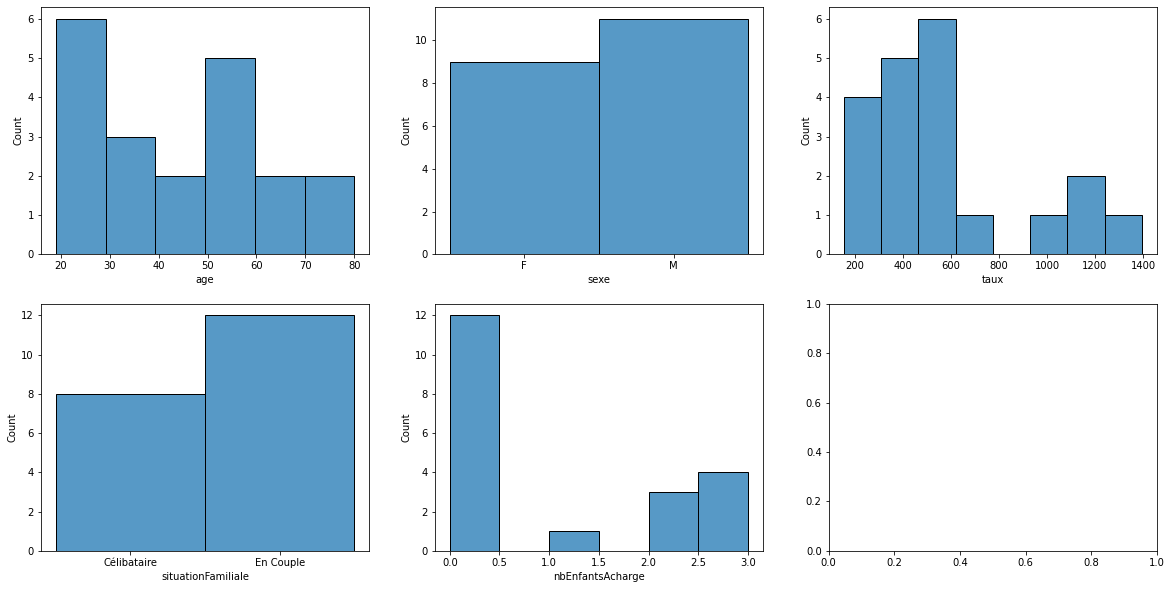

In [57]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
sns.histplot(marketing_df.age, ax=axs[0, 0])
sns.histplot(marketing_df.sexe, ax=axs[0, 1])
sns.histplot(marketing_df.taux, ax=axs[0, 2])
sns.histplot(marketing_df.situationFamiliale, ax=axs[1, 0])
sns.histplot(marketing_df.nbEnfantsAcharge, ax=axs[1, 1])
#sns.histplot(marketing_df["2eme voiture"], ax=axs[1, 2])

In [58]:
client_df.loc[(client_df.taux < 544) | (client_df.taux > 74185), "taux"]

0         522
3         522
5         522
6         522
9         522
         ... 
199991    522
199992    522
199994    522
199995    522
199998    522
Name: taux, Length: 110107, dtype: int32

# Préparation des données

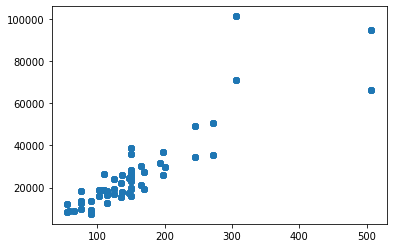

In [59]:
plt.scatter(catalog_df.puissance, catalog_df.prix)

In [60]:
catalog_df.head(30)

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350
5,Volvo,S80 T6,272,très longue,5,5,gris,False,50500
6,Volvo,S80 T6,272,très longue,5,5,bleu,False,50500
7,Volvo,S80 T6,272,très longue,5,5,rouge,True,35350
8,Volvo,S80 T6,272,très longue,5,5,blanc,True,35350
9,Volvo,S80 T6,272,très longue,5,5,noir,True,35350


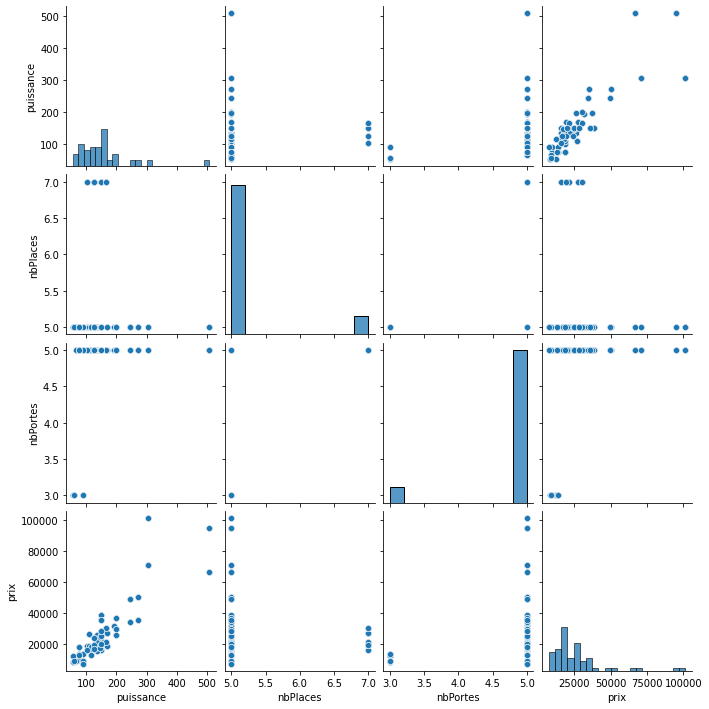

In [61]:
sns.pairplot(catalog_df.drop(['occasion'], axis=1))

In [62]:
X_cat = catalog_df.drop(['marque', 'couleur', 'occasion', 'nbPortes'], axis=1)
X_cat

,nom,puissance,longueur,nbPlaces,prix
0,S80 T6,272,très longue,5,50500
1,S80 T6,272,très longue,5,50500
2,S80 T6,272,très longue,5,50500
3,S80 T6,272,très longue,5,35350
4,S80 T6,272,très longue,5,35350
...,...,...,...,...,...
265,A2 1.4,75,courte,5,18310
266,A2 1.4,75,courte,5,18310
267,A2 1.4,75,courte,5,12817
268,A2 1.4,75,courte,5,12817


In [63]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
X_cat.longueur = lb.fit_transform(X_cat.longueur)
X_cat.nom = lb.fit_transform(X_cat.nom)
X_cat

,nom,puissance,longueur,nbPlaces,prix
0,25,272,3,5,50500
1,25,272,3,5,50500
2,25,272,3,5,50500
3,25,272,3,5,35350
4,25,272,3,5,35350
...,...,...,...,...,...
265,3,75,0,5,18310
266,3,75,0,5,18310
267,3,75,0,5,12817
268,3,75,0,5,12817


In [64]:
# from sklearn.cluster import AgglomerativeClustering

# cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
# cluster.fit_predict(X_cat)

In [65]:
# print(cluster.labels_)

In [66]:
# catalog_df['categorie'] = cluster.labels_

In [67]:
# from sklearn.preprocessing import MinMaxScaler

# m_scaler = MinMaxScaler()
# X_cat = m_scaler.fit_transform(X_cat)

In [68]:
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=0)
    k_means.fit(X_cat)
    inertias.append(k_means.inertia_)

print(inertias)

[97624244657.87036, 27720392073.958324, 12745959922.249575, 6502647479.107142, 4276114497.964617, 2488742992.886002, 1125419081.9149475, 838268407.4880953, 596739220.2056278, 464923949.2916666]


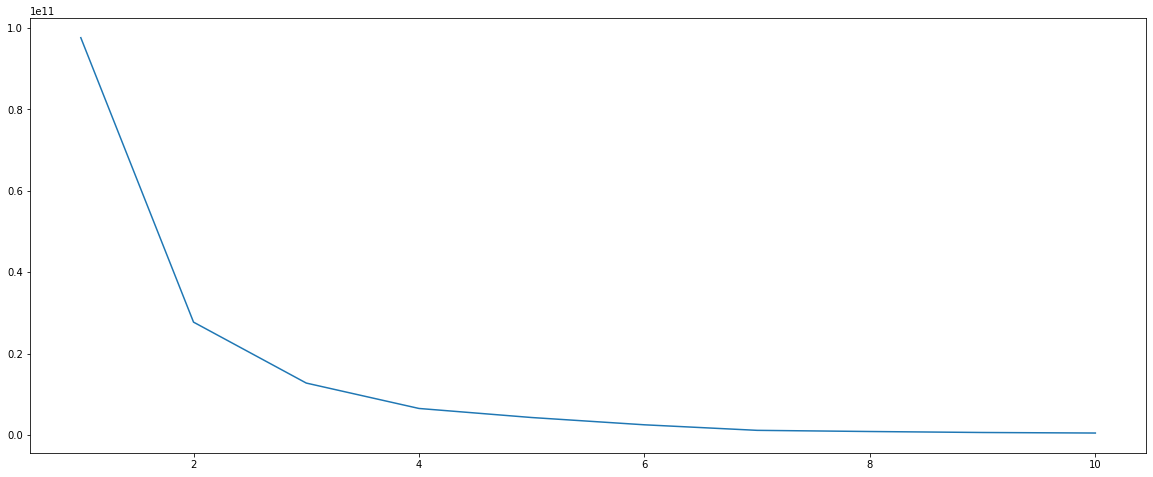

In [69]:
plt.figure(figsize=(20, 8))
plt.plot([i  for i in range(1, 11)] ,inertias);

Kmeans

In [70]:
k_means = KMeans(n_clusters=4, init='k-means++', random_state=0)
y = k_means.fit_predict(X_cat)
catalog_df['categorie'] = y

<AxesSubplot:xlabel='puissance', ylabel='Count'>

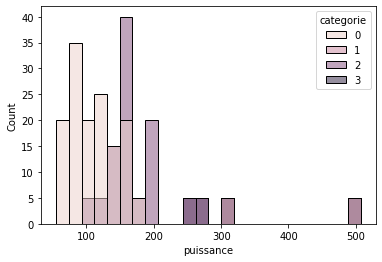

In [71]:
sns.histplot(data=catalog_df, x='puissance', hue='categorie')

On remarque que les véhicules de catégories 0 ont moins de puissances que les autres, les véhicules de catégorie 1 ont plus de puissances que les autres. Et les véhicules de catégorie 2 ont une puissance moyenne 180 - 280

<AxesSubplot:xlabel='puissance', ylabel='Count'>

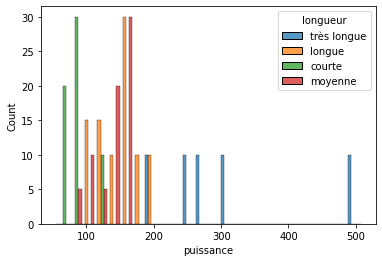

In [72]:
sns.histplot(data=catalog_df, x='puissance', hue='longueur', multiple='dodge')

<AxesSubplot:xlabel='longueur', ylabel='Count'>

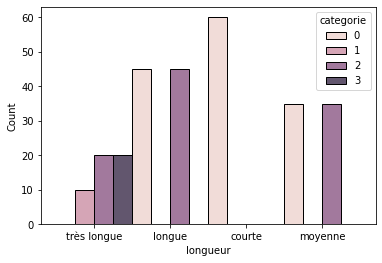

In [73]:
sns.histplot(data=catalog_df, x='longueur', hue='categorie', multiple='dodge')

<AxesSubplot:xlabel='prix', ylabel='Count'>

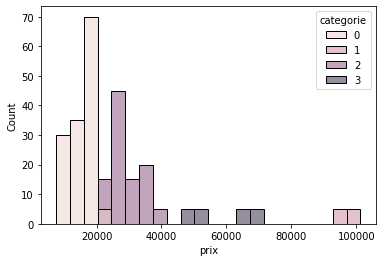

In [74]:
sns.histplot(data=catalog_df, x='prix', hue='categorie')

<AxesSubplot:xlabel='nbPortes', ylabel='Count'>

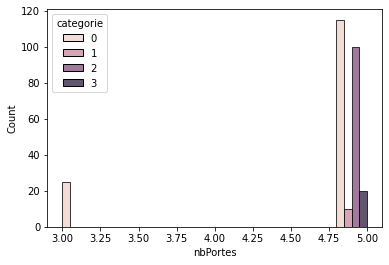

In [75]:
sns.histplot(data=catalog_df, x='nbPortes', hue='categorie', multiple='dodge')

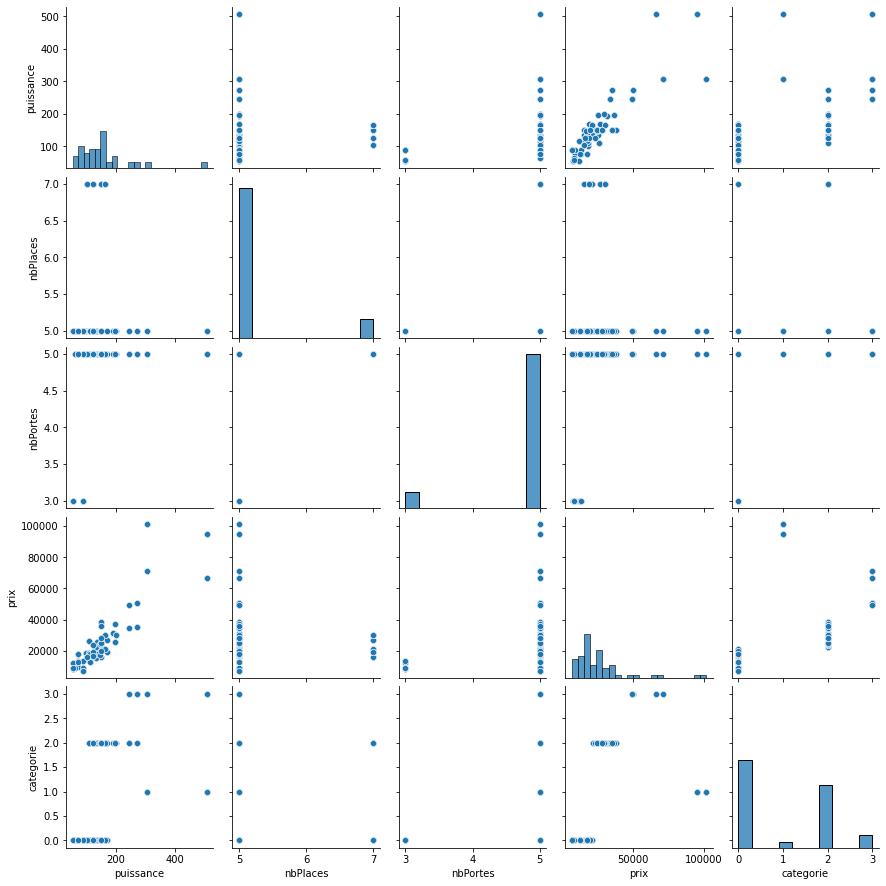

In [76]:
sns.pairplot(catalog_df.drop(['occasion'], axis=1))

In [77]:
catalog_df[catalog_df.categorie==0]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,categorie
11,Volkswagen,Touran 2.0 FSI,150,longue,7,5,gris,True,19138,0
12,Volkswagen,Touran 2.0 FSI,150,longue,7,5,bleu,True,19138,0
15,Volkswagen,Touran 2.0 FSI,150,longue,7,5,blanc,True,19138,0
16,Volkswagen,Touran 2.0 FSI,150,longue,7,5,noir,True,19138,0
17,Volkswagen,Touran 2.0 FSI,150,longue,7,5,rouge,True,19138,0
...,...,...,...,...,...,...,...,...,...,...
265,Audi,A2 1.4,75,courte,5,5,noir,False,18310,0
266,Audi,A2 1.4,75,courte,5,5,rouge,False,18310,0
267,Audi,A2 1.4,75,courte,5,5,blanc,True,12817,0
268,Audi,A2 1.4,75,courte,5,5,rouge,True,12817,0


In [78]:
catalog_df[catalog_df.categorie==1]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,categorie
149,Mercedes,S500,306,très longue,5,5,bleu,False,101300,1
151,Mercedes,S500,306,très longue,5,5,noir,False,101300,1
152,Mercedes,S500,306,très longue,5,5,blanc,False,101300,1
153,Mercedes,S500,306,très longue,5,5,rouge,False,101300,1
154,Mercedes,S500,306,très longue,5,5,gris,False,101300,1
231,BMW,M5,507,très longue,5,5,gris,False,94800,1
232,BMW,M5,507,très longue,5,5,blanc,False,94800,1
233,BMW,M5,507,très longue,5,5,noir,False,94800,1
236,BMW,M5,507,très longue,5,5,bleu,False,94800,1
238,BMW,M5,507,très longue,5,5,rouge,False,94800,1


In [79]:
catalog_df[catalog_df.categorie==2]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,categorie
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350,2
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350,2
7,Volvo,S80 T6,272,très longue,5,5,rouge,True,35350,2
8,Volvo,S80 T6,272,très longue,5,5,blanc,True,35350,2
9,Volvo,S80 T6,272,très longue,5,5,noir,True,35350,2
...,...,...,...,...,...,...,...,...,...,...
251,Audi,A3 2.0 FSI,150,moyenne,5,5,noir,False,28500,2
252,Audi,A3 2.0 FSI,150,moyenne,5,5,rouge,False,28500,2
254,Audi,A3 2.0 FSI,150,moyenne,5,5,blanc,False,28500,2
257,Audi,A3 2.0 FSI,150,moyenne,5,5,bleu,False,28500,2


In [80]:
catalog_df[catalog_df.categorie==3]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,categorie
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500,3
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500,3
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500,3
5,Volvo,S80 T6,272,très longue,5,5,gris,False,50500,3
6,Volvo,S80 T6,272,très longue,5,5,bleu,False,50500,3
75,Renault,Vel Satis 3.5 V6,245,très longue,5,5,gris,False,49200,3
76,Renault,Vel Satis 3.5 V6,245,très longue,5,5,bleu,False,49200,3
77,Renault,Vel Satis 3.5 V6,245,très longue,5,5,blanc,False,49200,3
78,Renault,Vel Satis 3.5 V6,245,très longue,5,5,noir,False,49200,3
79,Renault,Vel Satis 3.5 V6,245,très longue,5,5,rouge,False,49200,3


In [81]:
catalog_df.loc[catalog_df.categorie==0, "categorie"] = 'citadine'
catalog_df.loc[catalog_df.categorie==1, "categorie"] = 'sport'
catalog_df.loc[catalog_df.categorie==2, "categorie"] = 'routière'
catalog_df.loc[catalog_df.categorie==3, "categorie"] = 'familiale'

In [82]:
catalog_df

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,categorie
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500,familiale
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500,familiale
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500,familiale
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350,routière
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350,routière
...,...,...,...,...,...,...,...,...,...,...
265,Audi,A2 1.4,75,courte,5,5,noir,False,18310,citadine
266,Audi,A2 1.4,75,courte,5,5,rouge,False,18310,citadine
267,Audi,A2 1.4,75,courte,5,5,blanc,True,12817,citadine
268,Audi,A2 1.4,75,courte,5,5,rouge,True,12817,citadine


# Fusion des données clients et immatriculations

On va d'abord 'set' les catégories de véhicules de catalog aux véhicules d'immatriculation

In [83]:
cars_df = pd.merge(catalog_df, im_df, how='inner', on=['nom', 'marque', 'puissance', 'longueur', 'nbPlaces', 'nbPortes','couleur', 'occasion', 'prix'])

In [84]:
cars_df.isna().any()

marque             False
nom                False
puissance          False
longueur           False
nbPlaces           False
nbPortes           False
couleur            False
occasion           False
prix               False
categorie          False
immatriculation    False
dtype: bool

Vu que les données d'immatriculations de véhicules sont unique, on fera un *inner join* en fonction de l'immatriculation

In [85]:
data = pd.merge(client_df, cars_df, on='immatriculation', how='left')

In [86]:
data.isna().any()

age                   False
sexe                  False
taux                  False
situationFamiliale    False
nbEnfantsAcharge      False
2eme voiture          False
immatriculation       False
marque                False
nom                   False
puissance             False
longueur              False
nbPlaces              False
nbPortes              False
couleur               False
occasion              False
prix                  False
categorie             False
dtype: bool

In [87]:
data.drop_duplicates()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,categorie
0,38,M,522,En Couple,3,True,2951 II 77,Volvo,S80 T6,272,très longue,5,5,gris,False,50500,familiale
1,50,M,590,En Couple,1,True,1453 CD 31,Jaguar,X-Type 2.5 V6,197,longue,5,5,blanc,True,25970,routière
2,54,F,558,En Couple,0,True,6099 TQ 49,BMW,M5,507,très longue,5,5,gris,True,66360,familiale
3,35,M,522,En Couple,0,True,3352 BH 16,BMW,M5,507,très longue,5,5,noir,True,66360,familiale
4,43,M,904,En Couple,4,True,8550 VG 50,BMW,M5,507,très longue,5,5,blanc,False,94800,sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198985,57,M,522,En Couple,2,True,3152 DW 28,Fiat,Croma 2.2,147,longue,5,5,blanc,True,17346,citadine
198986,64,M,572,Célibataire,2,True,3938 CV 41,Mercedes,S500,306,très longue,5,5,gris,True,70910,familiale
198987,22,M,567,En Couple,0,True,7911 ZQ 15,Jaguar,X-Type 2.5 V6,197,longue,5,5,bleu,True,25970,routière
198988,55,M,522,En Couple,3,True,3817 TC 79,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350,routière


# Création d'un modèle de classification

On selectionne le même nombre de valeurs de la target variable de tel sorte à avoir la même probabilité pour chaque valeur

In [88]:
data.categorie.value_counts()

citadine     74565
routière     70567
familiale    33181
sport        20677
Name: categorie, dtype: int64

In [89]:
c_df = data[data.categorie == 'citadine'].sample(20677).reset_index(drop=True)
r_df = data[data.categorie == 'routière'].sample(20677).reset_index(drop=True)
s_df = data[data.categorie == 'sport'].sample(20677).reset_index(drop=True)
f_df = data[data.categorie == 'familiale'].sample(20677).reset_index(drop=True)

On régroupe les données et on les shuffle

In [90]:
df = pd.concat([c_df, r_df, s_df, f_df]).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82708 entries, 0 to 82707
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 82708 non-null  int32 
 1   sexe                82708 non-null  object
 2   taux                82708 non-null  int32 
 3   situationFamiliale  82708 non-null  object
 4   nbEnfantsAcharge    82708 non-null  int32 
 5   2eme voiture        82708 non-null  bool  
 6   immatriculation     82708 non-null  object
 7   marque              82708 non-null  object
 8   nom                 82708 non-null  object
 9   puissance           82708 non-null  int64 
 10  longueur            82708 non-null  object
 11  nbPlaces            82708 non-null  int64 
 12  nbPortes            82708 non-null  int64 
 13  couleur             82708 non-null  object
 14  occasion            82708 non-null  bool  
 15  prix                82708 non-null  int64 
 16  categorie           82

In [92]:
y = df.loc[:, 'categorie']
y

0         citadine
1         citadine
2        familiale
3         routière
4            sport
           ...    
82703     citadine
82704    familiale
82705     citadine
82706        sport
82707     citadine
Name: categorie, Length: 82708, dtype: object

On sélectionne ces variables d'entrées car ce sont les variables de notre jeu de test

In [93]:
X = df.loc[:, ['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge', '2eme voiture']]
X

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,26,M,1334,Célibataire,0,True
1,57,M,893,Célibataire,0,True
2,75,M,522,En Couple,4,True
3,49,M,587,En Couple,2,True
4,61,M,820,En Couple,3,True
...,...,...,...,...,...,...
82703,74,M,1052,En Couple,0,True
82704,25,F,522,En Couple,0,True
82705,41,M,1224,Célibataire,0,True
82706,32,M,753,En Couple,0,True


Import de modules scikit-learn

In [94]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

On encode les variables catégorielle et on normalise l'ensemble des données

In [95]:
lb = LabelEncoder()
mm = MinMaxScaler()

for col in X.select_dtypes('object').columns:
    X.loc[:, col] = lb.fit_transform(X.loc[:, col])
    
for col in X.select_dtypes('bool').columns:
    X.loc[:, col] = lb.fit_transform(X.loc[:, col])

# X = mm.fit_transform(X)
# y = lb.fit_transform(y)

Split des données en train et test

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [97]:
# cv = KFold(n_splits=10)

# models = (
#         ('SVC', SVC(random_state=0)),
#         ('RandomForest', RandomForestClassifier(n_estimators=5, random_state=0)),
#         ('DecisionTree', DecisionTreeClassifier(random_state=0)),
#         ('KNN', KNeighborsClassifier(n_neighbors=3))
# )

In [98]:
# for name, clf in models:
#     pipeline = Pipeline([('estimator', clf)])
#     scores = cross_val_score(pipeline, X_train, y_train, cv=cv)
#     print(f"Estimator: {name}, Mean ROC AUC: {round(scores.mean(), 2)}, Std: {round(scores.std(), 2)}")

### Logistic Regression

In [99]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_logreg = logreg.predict(X_test)


C:\Users\Akach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matrice de confusion

In [100]:
pd.DataFrame(confusion_matrix(y_test, y_logreg))

,0,1,2,3
0,4565,511,594,553
1,780,4317,672,505
2,2540,1444,928,1308
3,787,421,250,4638


Rapport de classification

In [101]:
print(classification_report(y_test, y_logreg))

              precision    recall  f1-score   support

    citadine       0.53      0.73      0.61      6223
   familiale       0.65      0.69      0.67      6274
    routière       0.38      0.15      0.21      6220
       sport       0.66      0.76      0.71      6096

    accuracy                           0.58     24813
   macro avg       0.55      0.58      0.55     24813
weighted avg       0.55      0.58      0.55     24813



### SVC

In [102]:
svc = SVC(gamma='auto').fit(X_train, y_train)
y_svc = svc.predict(X_test)

Matrice de confusion

In [103]:
pd.DataFrame(confusion_matrix(y_test, y_svc))

,0,1,2,3
0,3100,398,1751,974
1,201,4352,1715,6
2,1288,1341,2300,1291
3,277,15,223,5581


Rapport de classification

In [104]:
print(classification_report(y_test, y_svc))

              precision    recall  f1-score   support

    citadine       0.64      0.50      0.56      6223
   familiale       0.71      0.69      0.70      6274
    routière       0.38      0.37      0.38      6220
       sport       0.71      0.92      0.80      6096

    accuracy                           0.62     24813
   macro avg       0.61      0.62      0.61     24813
weighted avg       0.61      0.62      0.61     24813



### RandomForestClassifier

In [105]:
rfc = RandomForestClassifier(max_depth=5, random_state=0, criterion='entropy').fit(X_train, y_train)
y_rfc = rfc.predict(X_test)

Matrice de confusion

In [106]:
pd.DataFrame(confusion_matrix(y_test, y_rfc))

,0,1,2,3
0,3833,211,1715,464
1,22,4249,1998,5
2,1241,1198,2340,1441
3,3,13,17,6063


Rapport de classification

In [107]:
print(classification_report(y_test, y_rfc))

              precision    recall  f1-score   support

    citadine       0.75      0.62      0.68      6223
   familiale       0.75      0.68      0.71      6274
    routière       0.39      0.38      0.38      6220
       sport       0.76      0.99      0.86      6096

    accuracy                           0.66     24813
   macro avg       0.66      0.67      0.66     24813
weighted avg       0.66      0.66      0.66     24813



### DecisionTree

In [108]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=0).fit(X_train, y_train)
lb.fit_transform(y_test)
y_dt = dtc.predict(X_test)

Matrice de confusion

In [109]:
pd.DataFrame(confusion_matrix(y_test, y_dt))

,0,1,2,3
0,3780,304,1675,464
1,7,4419,1843,5
2,1197,1380,2202,1441
3,3,13,18,6062


Rapport de classification

In [110]:
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

    citadine       0.76      0.61      0.67      6223
   familiale       0.72      0.70      0.71      6274
    routière       0.38      0.35      0.37      6220
       sport       0.76      0.99      0.86      6096

    accuracy                           0.66     24813
   macro avg       0.66      0.67      0.65     24813
weighted avg       0.66      0.66      0.65     24813



### KNN

In [111]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_knn = knn.predict(X_test)

Matrice de confustion

In [112]:
pd.DataFrame(confusion_matrix(y_test, y_knn))

,0,1,2,3
0,3658,569,1407,589
1,928,4134,1202,10
2,2239,1501,1593,887
3,743,12,428,4913


Rapport de classification

In [113]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

    citadine       0.48      0.59      0.53      6223
   familiale       0.67      0.66      0.66      6274
    routière       0.34      0.26      0.29      6220
       sport       0.77      0.81      0.79      6096

    accuracy                           0.58     24813
   macro avg       0.57      0.58      0.57     24813
weighted avg       0.56      0.58      0.57     24813



In [114]:
# for name, clf in models:
#     pipeline = Pipeline([('estimator', clf)])
#     scores = cross_val_score(pipeline, X_train, y_train, scoring="roc_auc")
#     print(f"Estimator: {name}, Mean ROC AUC: {round(scores.mean(), 2)}, Std: {round(scores.std(), 2)}")

### Reseaux de neurones

In [115]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

### on encode la variable cible en numerique

In [116]:
y

0         citadine
1         citadine
2        familiale
3         routière
4            sport
           ...    
82703     citadine
82704    familiale
82705     citadine
82706        sport
82707     citadine
Name: categorie, Length: 82708, dtype: object

In [117]:
y_nn = lb.fit_transform(y)

0 -> citadine
1 -> routière
2 -> sport

Data split

In [118]:
Xnn_train, Xnn_test, ynn_train, ynn_test = train_test_split(X, y_nn,test_size = 0.3, random_state = 0)

input/ hidden layers

In [119]:
ann = Sequential()
ann.add(Dense(10, input_dim=6, activation="relu"))
ann.add(Dense(1 , activation="linear"))

output layer

In [120]:
ann.add(Dense(1, activation = 'softmax'))

In [121]:
ann.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [122]:
ann.fit(Xnn_train, ynn_train, batch_size = 10, epochs = 50)

Epoch 1/50
5790/5790 [==============================] - 9s 1ms/step - loss: -139985.6875 - accuracy: 0.2499
Epoch 2/50
5790/5790 [==============================] - 8s 1ms/step - loss: -1393191.8750 - accuracy: 0.2499
Epoch 3/50
5790/5790 [==============================] - 8s 1ms/step - loss: -4720197.0000 - accuracy: 0.2499
Epoch 4/50
5790/5790 [==============================] - 8s 1ms/step - loss: -10971549.0000 - accuracy: 0.2499
Epoch 5/50
5790/5790 [==============================] - 8s 1ms/step - loss: -20951466.0000 - accuracy: 0.2499
Epoch 6/50
5790/5790 [==============================] - 8s 1ms/step - loss: -35468196.0000 - accuracy: 0.2499
Epoch 7/50
5790/5790 [==============================] - 8s 1ms/step - loss: -55275200.0000 - accuracy: 0.2499
Epoch 8/50
5790/5790 [==============================] - 8s 1ms/step - loss: -81251480.0000 - accuracy: 0.2499
Epoch 9/50
5790/5790 [==============================] - 9s 2ms/step - loss: -114201576.0000 - accuracy: 0.2499
Epoch 10/50
5

In [123]:
ynn_pred = ann.predict(X_test)

Matrice de confusion

In [124]:
pd.DataFrame(confusion_matrix(ynn_test, ynn_pred))

,0,1,2,3
0,0,6189,0,0
1,0,6207,0,0
2,0,6156,0,0
3,0,6261,0,0


Rapport de classification

In [125]:
print(classification_report(ynn_test, ynn_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6189
           1       0.25      1.00      0.40      6207
           2       0.00      0.00      0.00      6156
           3       0.00      0.00      0.00      6261

    accuracy                           0.25     24813
   macro avg       0.06      0.25      0.10     24813
weighted avg       0.06      0.25      0.10     24813



C:\Users\Akach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Choix du meilleur algorithme

Le modèle retenu est le random forest car il a eu l'une des meilleure précision en plus d'être rapide

In [126]:
marketing_df

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,F,1396,Célibataire,0,False
1,35,M,223,Célibataire,0,False
2,48,M,401,Célibataire,0,False
3,26,F,420,En Couple,3,True
4,80,M,530,En Couple,3,False
5,27,F,153,En Couple,2,False
6,59,F,572,En Couple,2,False
7,43,F,431,Célibataire,0,False
8,64,M,559,Célibataire,0,False
9,22,M,154,En Couple,1,False


In [127]:
# mX = marketing_df.values
for col in marketing_df.select_dtypes('object').columns:
    marketing_df.loc[:, col] = lb.fit_transform(marketing_df.loc[:, col])

for col in marketing_df.select_dtypes('bool').columns:
    marketing_df.loc[:, col] = lb.fit_transform(marketing_df.loc[:, col])

In [128]:
marketing_df

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,0,1396,0,0,0
1,35,1,223,0,0,0
2,48,1,401,0,0,0
3,26,0,420,1,3,1
4,80,1,530,1,3,0
5,27,0,153,1,2,0
6,59,0,572,1,2,0
7,43,0,431,0,0,0
8,64,1,559,0,0,0
9,22,1,154,1,1,0


In [129]:
mX = marketing_df.values

In [130]:
mX = mm.fit_transform(mX)

In [131]:
mY_pred = rfc.predict(mX)

C:\Users\Akach\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [135]:
pd.DataFrame(mY_pred)

,0
0,citadine
1,citadine
2,citadine
3,routière
4,routière
5,routière
6,routière
7,citadine
8,citadine
9,routière
